In [1]:
import argparse
import csv
import os
import shutil
import subprocess
import tempfile
from os.path import join
from pathlib import Path

import nibabel as nib
import numpy as np
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
import scipy.ndimage as ndimage
from nilearn import datasets, image, plotting

In [2]:
import numpy as np
data = np.load('/home/zkavian/Thesis_code_Glm_Opt/projection_voxel_foldavg_sub9_ses1_task0.8_bold0.8_beta0.5_smooth0.6_gamma1.npy')

In [3]:
data.shape

(4980,)

In [7]:
import numpy as np
import os
import join

try:
    from empca.empca import empca
except ModuleNotFoundError:
    repo_root = os.path.abspath(join(os.path.dirname(__file__), ".."))
    if repo_root not in sys.path:
        sys.path.insert(0, repo_root)
    from empca.empca import empca



tmp = np.load('/Data/zahra/results_beta_preprocessed/group_concat/empca_model_group.npy', allow_pickle=True)
tmp.shape

ModuleNotFoundError: No module named 'join'

/home/zkavian/Thesis_code_Glm_Opt/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



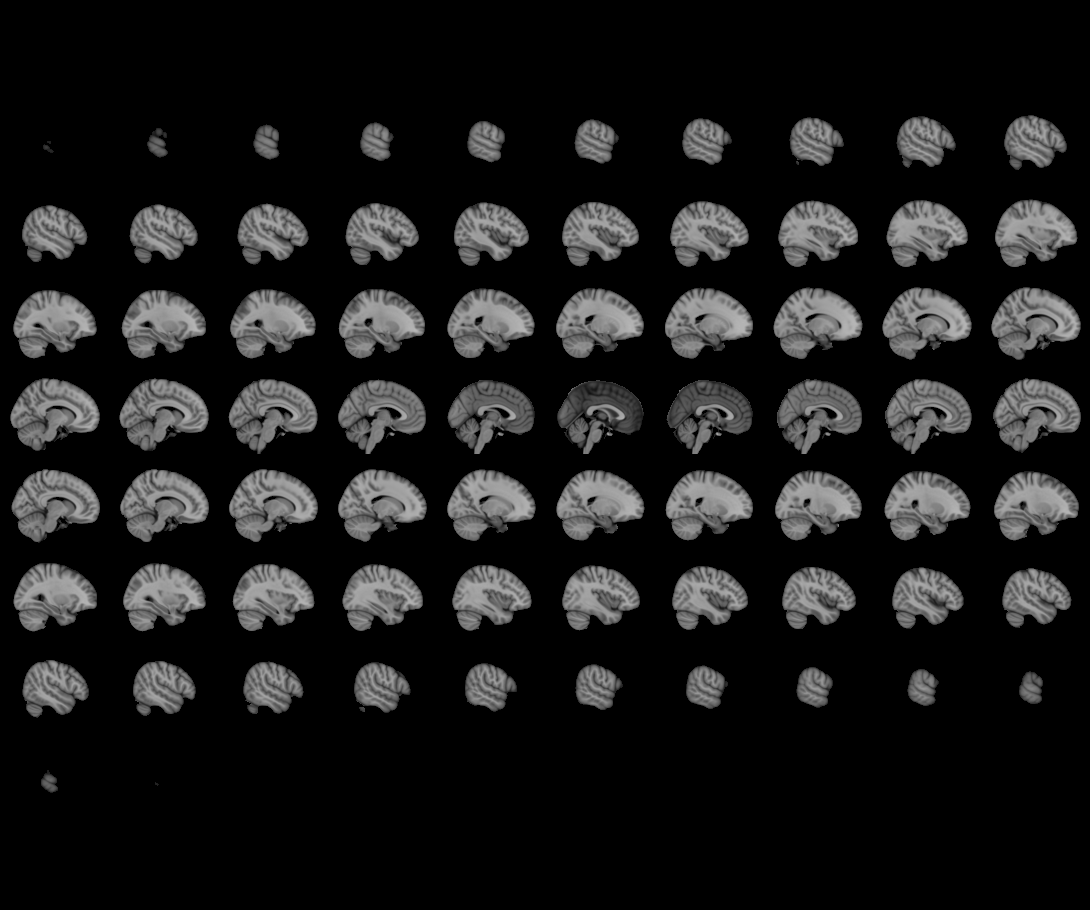
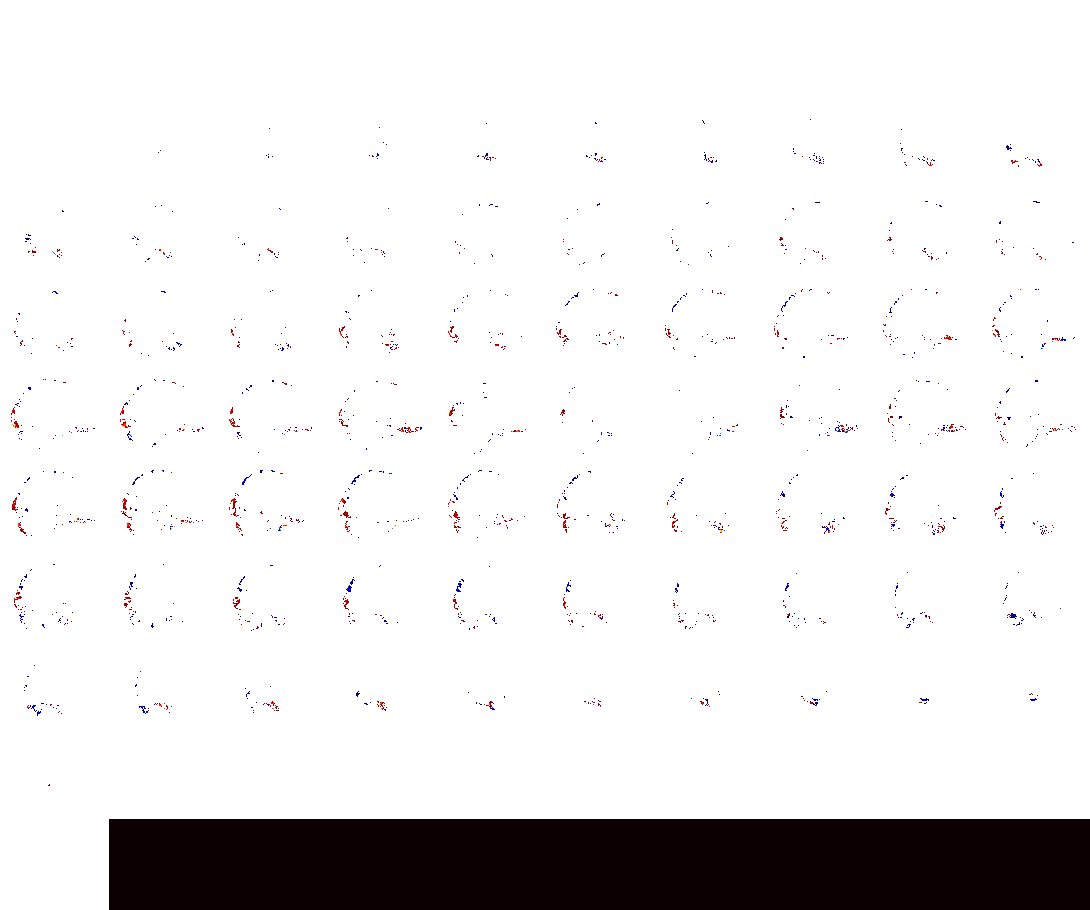

In [7]:
import numpy as np
import nibabel as nib
from nilearn import plotting

beta_path = "/Data/zahra/results_beta_preprocessed/group_concat/cleaned_beta_volume_group.npy"
mask_path = "/Data/zahra/results_beta_preprocessed/group_concat/common_mask_group.npy"
anat_path = "/Data/zahra/anatomy_masks/MNI152_T1_2mm_brain.nii.gz"

beta = np.load(beta_path, mmap_mode="r")          # (91781, 5220)
mask = np.load(mask_path).astype(bool)            # (91, 109, 91)
anat_img = nib.load(anat_path)

# Mean over trials (5220) -> one value per voxel
mean_beta = np.nanmean(beta, axis=1).astype(np.float32)  # (91781,)
mean_beta = np.nan_to_num(mean_beta, nan=0.0, posinf=0.0, neginf=0.0)

vol = np.zeros(mask.shape, dtype=np.float32)
vol[mask] = mean_beta

mean_beta_img = nib.Nifti1Image(vol, anat_img.affine, anat_img.header)

# optional alias so you can call nib.plotting_view(...)
nib.plotting_view = plotting.view_img

thr = float(np.percentile(np.abs(mean_beta), 95))
view = nib.plotting_view(
    mean_beta_img,
    bg_img=anat_img,
    cmap="cold_hot",
    symmetric_cmap=True,
    threshold=thr,
    colorbar=True,
    title="Mean beta over 5220 trials",
)

view


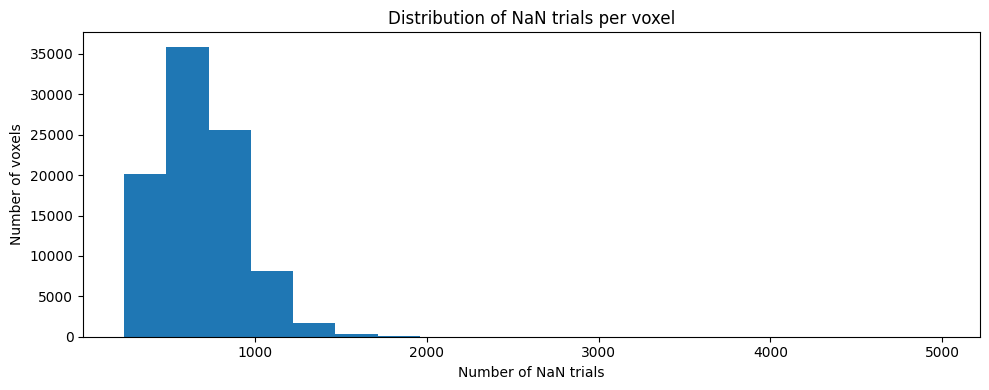

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
path = "/Data/zahra/results_beta_preprocessed/group_concat/cleaned_beta_volume_group.npy"
data = np.load(path)

# Assume last axis is trials; count NaNs per voxel across trials
nan_counts = np.sum(np.isnan(data), axis=-1).ravel()

# Keep only voxels with 1..5220 NaN trials
nan_counts = nan_counts[(nan_counts >= 1) & (nan_counts <= 5220)]

# Histogram with integer bins 1..5220
bins = np.arange(1, 5220 + 2)  # +2 so 5220 is included
plt.figure(figsize=(10, 4))
plt.hist(nan_counts)
plt.xlim(1, 5220)
plt.xlabel("Number of NaN trials")
plt.ylabel("Number of voxels")
plt.title("Distribution of NaN trials per voxel")
plt.tight_layout()
plt.show()


In [14]:
import scipy
data = scipy.io.loadmat('/Data/zahra/behaviour/PSPD004_OFF_behav_metrics.mat')
new_data = np.zeros((90, 6))

for i in range(9):
    new_data[i*10:(i+1)*10,:] = data['behav_metrics'][0,i][:10, 0:6]

new_data.shape

(90, 6)

In [22]:
import os
import glob
import re
import numpy as np
import scipy.io as sio

src_dir = "/Data/zahra/behaviour/raw"
dst_dir = "/Data/zahra/behaviour"

os.makedirs(dst_dir, exist_ok=True)

for path in glob.glob(os.path.join(src_dir, "*.mat")):
    data = sio.loadmat(path)

    run1 = np.zeros((90, 6))
    run2 = np.zeros((90, 6))

    for i in range(9):
        run1[i*10:(i+1)*10, :] = data['behav_metrics'][0, i][:10, 0:6]
        run2[i*10:(i+1)*10, :] = data['behav_metrics'][0, i][10:, 0:6]

    base = os.path.splitext(os.path.basename(path))[0]

    # subject ID like PSPD004
    m = re.search(r"(PSPD0\d+)", base)
    subj = m.group(1) if m else "PSPD_unknown"

    # session tag based on OFF/ON
    if "OFF" in base:
        ses = "ses_1"
    elif "ON" in base:
        ses = "ses_2"
    else:
        ses = "ses_unknown"

    out_run1 = os.path.join(dst_dir, f"{subj}_{ses}_run_1.npy")
    out_run2 = os.path.join(dst_dir, f"{subj}_{ses}_run_2.npy")

    np.save(out_run1, run1)
    np.save(out_run2, run2)

print("Done.")


Done.


In [19]:
tmp = np.load('/Data/zahra/behaviour/reserved/PSPD004_OFF_behav_metrics.npy')
tmp.shape

(90, 6)

In [3]:
data = np.load('/Data/zahra/results/sub-pd011/ses-2/GLMOutputs-mni-std/TYPED_FITHRF_GLMDENOISE_RR.npy', allow_pickle=True).item()
data['betasmd'].shape

(91781, 1, 1, 173)

In [7]:
trials = np.load('/Data/zahra/results/sub-pd011/ses-2/GLMOutputs-mni-std/trial_keep_run1.npy', allow_pickle=True)
trials

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

/tmp/ipykernel_3355547/993962080.py:7: UserWarning: kwargs['alpha']=0.7 detected in parameters.
Overriding with transparency=None.
To suppress this warning pass your 'alpha' value via the 'transparency' parameter.
  plotting.plot_epi(mask, bg_img = anat_file, display_mode='ortho', cut_coords=(0, 0, 0), alpha=0.7)


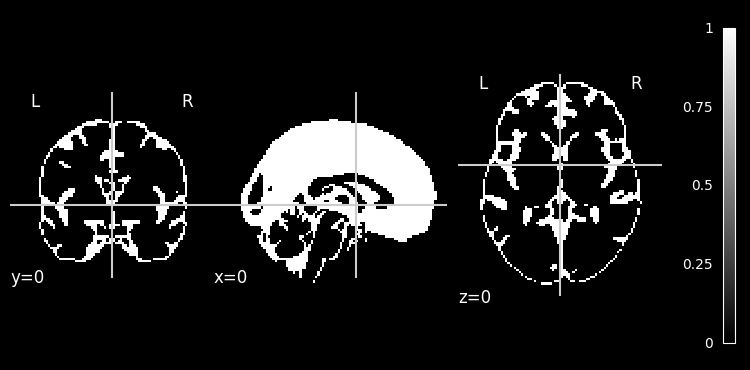

/home/zkavian/Thesis_code_Glm_Opt/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:868: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/tmp/ipykernel_3355547/993962080.py:10: UserWarning: Casting data from int32 to float32
  plotting.view_img(mask, bg_img=anat_file, opacity=0.6)
/tmp/ipykernel_3355547/993962080.py:10: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  plotting.view_img(mask, bg_img=anat_file, opacity=0.6)



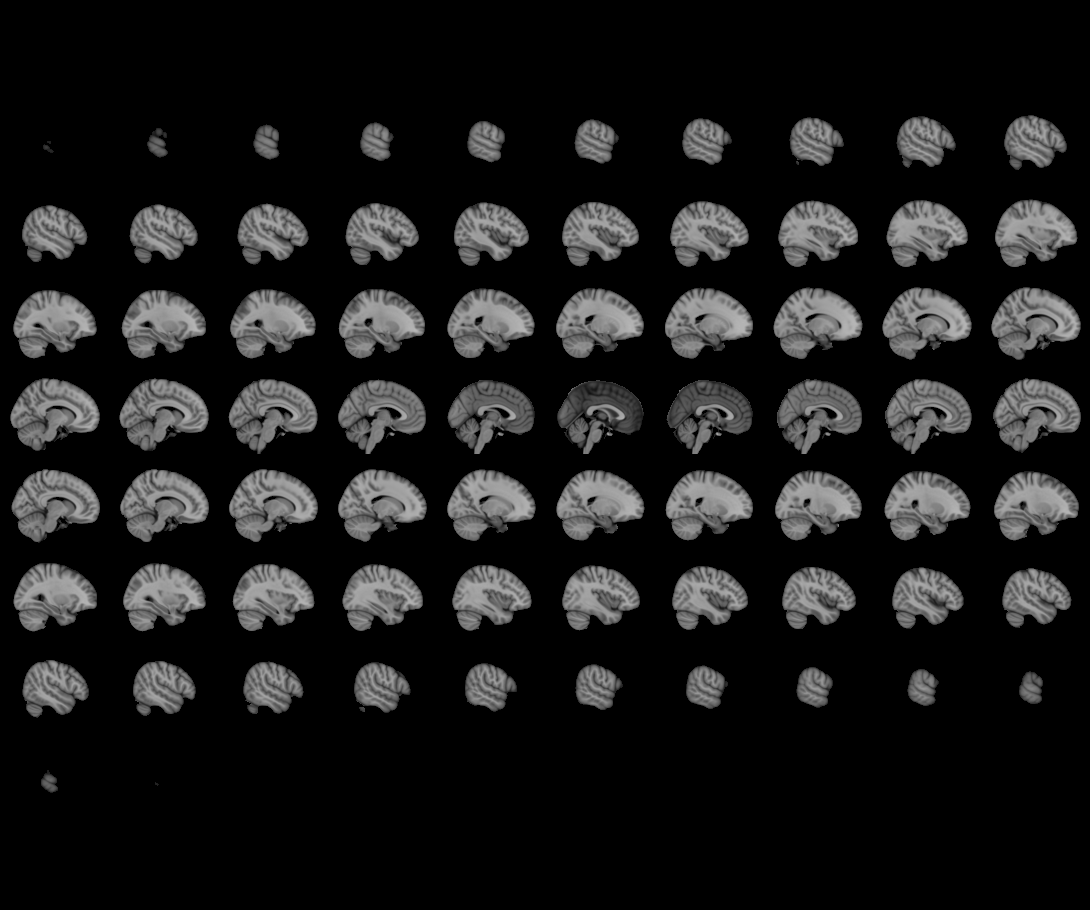
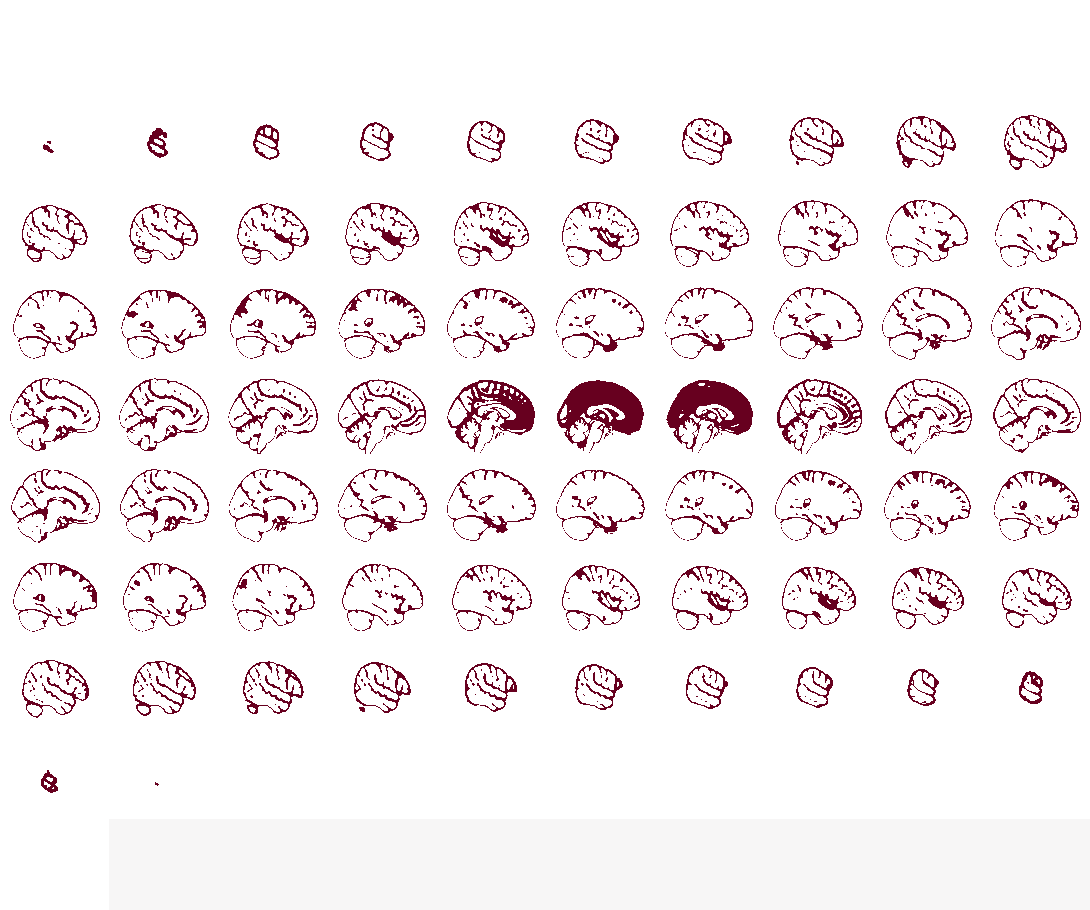

In [6]:
anat_file = nib.load('/Data/zahra/anatomy_masks/MNI152_T1_2mm_brain.nii.gz')
# bold = nib.load('/Data/zahra/bold_data/sub-pd004_ses-1_run-1_task-mv_bold_corrected_smoothed_mnireg-2mm.nii.gz')
mask = nib.load('/Data/zahra/anatomy_masks/MNI152_T1_2mm_brain_seg_csf.nii.gz')

# mean_bold = image.mean_img(bold)

plotting.plot_epi(mask, bg_img = anat_file, display_mode='ortho', cut_coords=(0, 0, 0), alpha=0.7)
plotting.show()

plotting.view_img(mask, bg_img=anat_file, opacity=0.6)

In [6]:
bold_data = nib.load('/mnt/TeamShare/Data_Masterfile/H20-00572_All-Dressed/PRECISIONSTIM_PD_Data_Results/fMRI_preprocessed_data/Rev_pipeline/derivatives/sub-pd009/ses-1/func/mnireg-2mm/sub-pd009_ses-1_run-1_task-mv_bold_corrected_smoothed_mnireg-2mm.nii.gz')
bold_data.shape

(91, 109, 91, 850)

In [8]:
anat = nib.load('/usr/local/fsl/data/standard/MNI152_T1_2mm_brain.nii.gz')
brain_mask = nib.load('/usr/local/fsl/data/standard/MNI152_T1_2mm_brain_mask.nii.gz')

In [14]:
from nilearn import datasets
from nilearn.image import load_img

gm_mask = datasets.load_mni152_gm_mask(resolution=2)
gm_img = load_img(gm_mask)


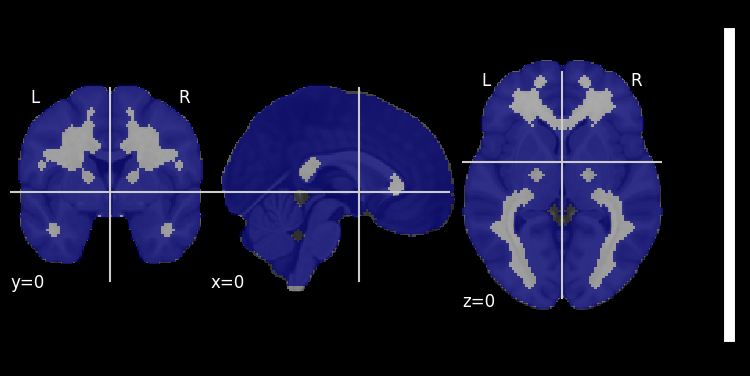

In [22]:
mni = datasets.load_mni152_template()
plotting.plot_roi(gm_img, bg_img=mni, display_mode="ortho", cut_coords=(0, 0, 0))
plotting.show()

In [ ]:
from nilearn import datasets
from nilearn.image import load_img

gm_mask = datasets.load_mni152_gm_mask(resolution=2)
gm_img = load_img(gm_mask)


In [16]:
from nilearn.image import resample_to_img

gm_resampled = resample_to_img(gm_img, bold_data, interpolation="nearest")
print(gm_resampled.shape)  # (91, 109, 91)

/tmp/ipykernel_2316526/2968987554.py:3: FutureWarning: 'force_resample' will be set to 'True' by default in Nilearn 0.13.0.
Use 'force_resample=True' to suppress this warning.
  gm_resampled = resample_to_img(gm_img, bold_data, interpolation="nearest")


(91, 109, 91)


/tmp/ipykernel_2316526/2968987554.py:3: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  gm_resampled = resample_to_img(gm_img, bold_data, interpolation="nearest")


In [15]:
gm_img.shape

(99, 117, 95)

In [17]:
gm_resampled.shape

(91, 109, 91)

In [13]:
from nilearn import datasets
tpm = datasets.fetch_icbm152_2009()

from nilearn.image import load_img, math_img
csf_prob = load_img(tpm['csf'])

csf_mask = math_img("img > 0.5", img=csf_prob)
csf_mask.shape

[fetch_icbm152_2009] Dataset created in /home/zkavian/nilearn_data/icbm152_2009
[fetch_icbm152_2009] Downloading data from https://osf.io/7pj92/download ...
Downloaded 17481728 of 63027871 bytes (27.7%%,    2.6s remaining)
Downloaded 56868864 of 63027871 bytes (90.2%%,    0.2s remaining)
[fetch_icbm152_2009]  ...done. (4 seconds, 0 min)

[fetch_icbm152_2009] Extracting data from /home/zkavian/nilearn_data/icbm152_2009/6986d62a4af09641f8625dc5757f4796/download...
[fetch_icbm152_2009] .. done.



(197, 233, 189)

In [1]:
import numpy as np
glm_data = np.load('GLMsingle/GLMOutputs-sub09-ses1-std/TYPED_FITHRF_GLMDENOISE_RR.npy',allow_pickle=True).item()
glm_data.keys()

dict_keys(['HRFindex', 'HRFindexrun', 'glmbadness', 'pcvoxels', 'pcnum', 'xvaltrend', 'noisepool', 'pcregressors', 'betasmd', 'R2', 'R2run', 'rrbadness', 'FRACvalue', 'scaleoffset', 'meanvol'])

In [2]:
beta = glm_data['betasmd']
beta.shape

(426960, 1, 1, 177)

In [3]:
trial_idx = np.load('GLMsingle/GLMOutputs-sub09-ses1-std/trial_keep_run1.npy')
np.sum(trial_idx==False)

np.int64(2)

In [4]:
beta1 = beta[:,0,0,0:87]
beta1.shape

(426960, 87)

In [5]:
import nibabel as nib

data = nib.load('sub09_ses1/sub-pd009_ses-1_run-1_task-mv_bold_corrected_smoothed_reg.nii.gz')
x = data.get_fdata()
x.shape

(180, 256, 170, 850)

In [12]:
xp = np.load('csf_reg_sub09_ses1.npy')
xp.shape
xp1 = xp[0,:,0]
xp1 = xp1[trial_idx]
xp1.shape

(2, 850, 1)

In [9]:
tmp = np.load('GLMsingle/GLMOutputs-sub09-ses1-std/DESIGNINFO.npy', allow_pickle=True).item()
tmp.keys()

dict_keys(['design', 'stimdur', 'tr', 'params', 'designSINGLE', 'stimorder', 'numtrialrun', 'condcounts', 'condinruns', 'endbuffers'])

In [11]:
tmp['design']

2

In [13]:
tmp = np.load('GLMsingle/GLMOutputs-sub09-ses1-std/Xtask_beta_task_run2.npy')
tmp.shape

(426960, 850)

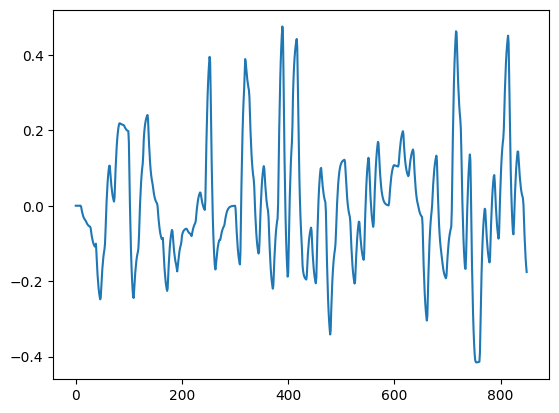

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(tmp[500,:])

In [3]:
import nibabel as nib
import numpy as np
data = nib.load('voxel_weights_mean_foldavg_sub09_ses1_task0.8_bold1_beta0.5_smooth1.2_gamma1.5.nii.gz')
volume = data.get_fdata()

In [4]:
np.any(np.isfinite(volume))

np.True_

In [ ]:

display_volume = np.nan_to_num(volume, nan=0.0, posinf=0.0, neginf=0.0)
display_volume = np.clip(display_volume, 0.0, colorbar_max)
clamped_ratio = np.clip(display_threshold_ratio, 0.0, 1.0)
threshold_value = colorbar_max * clamped_ratio
display_volume[display_volume < threshold_value] = 0.0
display_img = nib.Nifti1Image(display_volume, anat_img.affine, anat_img.header)
display = plotting.view_img(display_img, bg_img=anat_img, colorbar=True, symmetric_cmap=False,cmap='jet', threshold=threshold_value)
display.save_as_html(f"{result_prefix}_{file_prefix}.html")

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [4]:
import numpy as np
np.any(np.isfinite(data))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [8]:
import numpy as np
data = np.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/GLMOutputs-sub09-ses1-std/trial_keep_run1.npy')
data

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
data = np.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/GLMOutputs-sub09-ses1-std/TYPED_FITHRF_GLMDENOISE_RR.npy', allow_pickle=True).item()
data['betasmd'].shape

(426960, 1, 1, 177)

In [5]:
data = np.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/GLMOutputs-sub09-ses1-dvars/trial_keep_run1.npy')
data

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
data = np.load('/mnt/TeamShare/Data_Masterfile/Zahra-Thesis-Data/Msc_Proj_Nov/GLMOutputs-sub09-ses1/TYPED_FITHRF_GLMDENOISE_RR_sub09_ses01.npy', allow_pickle=True).item()
beta = data['betasmd']
beta.shape

(939701, 1, 1, 180)

In [6]:
beta = beta[:, 0, 0, 0:90]

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [10]:
np.nanmax(beta)

np.float32(10774.517)

In [4]:
def _save_beta_overlay(data, anat_img, out_html, threshold_pct, vmax_pct, cut_coords, snapshot_path):
    finite = data[np.isfinite(data)]
    thr = float(np.percentile(finite, threshold_pct))
    vmax = float(np.percentile(finite, vmax_pct))
    img = nib.Nifti1Image(data, anat_img.affine, anat_img.header)
    view = plotting.view_img(img, bg_img=anat_img, cmap='inferno', symmetric_cmap=False, threshold=thr, vmax=vmax, colorbar=True,
        title=f'Mean |beta| (thr p{threshold_pct}={thr:.2f}, vmax p{vmax_pct}={vmax:.2f})', cut_coords=cut_coords)
    view.save_as_html(out_html)
    
    display = plotting.plot_stat_map(img, bg_img=anat_img, cmap='inferno', symmetric_cmap=False, threshold=thr, vmax=vmax, colorbar=True,
                                     title=f'Mean |beta| (thr p{threshold_pct}, vmax p{vmax_pct})', cut_coords=cut_coords)
    display.savefig(snapshot_path)
    display.close()

In [ ]:
sub, ses, run = '09', '1', '1'

In [3]:
bold_img = nib.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/sub-pd009_ses-1_run-1_task-mv_bold_corrected_smoothed_reg.nii.gz')
bold_data = bold+img.get_fdata()
anat = nib.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/sub-pd009_ses-1_T1w_brain.nii.gz')
back_mask = nib.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/sub-pd009_ses-1_T1w_brain_mask.nii.gz')
csf_mask = nib.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/sub-pd009_ses-1_T1w_brain_pve_0.nii.gz')
gray_mask = nib.load('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/sub-pd009_ses-1_T1w_brain_pve_1.nii.gz')
go_times = np.loadtxt('/home/zkavian/Thesis_code_Glm_Opt/GLMsingle/PSPD009-ses-1-go-times.txt')

In [ ]:
cut_coords = tuple(args.cut_coords) if args.cut_coords else _precentral_cut_coords(data_root, sub, ses)
roi_tag = args.overlay_stat + ("_pos" if args.overlay_positive_only else "")

if cached_beta_path.exists() and not args.force:
    beta_volume_filter = np.load(cached_beta_path)
    mean_clean_active = _compute_beta_summary(
        beta_volume_filter,
        overlay_stat=args.overlay_stat,
        overlay_positive_only=args.overlay_positive_only,
    )
    _save_beta_overlay(
        mean_clean_active,
        anat_img=anat_img,
        out_html=str(output_dir / f'clean_active_beta_overlay_sub{sub}_ses{ses}_run{run}.html'),
        threshold_pct=args.overlay_threshold_pct,
        vmax_pct=args.overlay_vmax_pct,
        cut_coords=cut_coords,
        snapshot_path=str(args.snapshot_path) if args.snapshot_path else None)
    if not args.skip_roi_ranking:
        roi_rank_path = output_dir / f'roi_{roi_tag}_sub{sub}_ses{ses}_run{run}.csv'
        _rank_rois_by_beta(
            mean_clean_active,
            anat_img=anat_img,
            anat_path=data_paths['anat'],
            ref_img=roi_ref_img,
            out_path=roi_rank_path,
            atlas_threshold=args.roi_atlas_threshold,
            label_patterns=args.roi_label_patterns,
            assume_mni=args.roi_assume_mni,
            mni_template=args.roi_mni_template,
        )
    return